# Data Analysis Script for Information Sources


In [2]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [3]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Analyzing Questionnaire Data

In [5]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

raw_questionnaire


,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_2,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,2,0,1,0,3,0,1,2,2
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,7,0,1,0,3,0,2,2,2
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,2,2,0,1,0,3,0,2,2,3
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,1,1,0,1,0,3,0,2,2,2
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,2,0,1,0,3,0,2,3,3
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,2,5,0,1,0,3,0,2,2,2
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,1,0,1,0,3,0,2,3,2


In [6]:
# Adding subward as a separate variable
## First two digits of HHID are ward, next two digits are subward
raw_questionnaire['Subward'] = raw_questionnaire['HHID'].astype(str).str[:4].astype(int)

raw_questionnaire[300:350]



,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8,Subward
300,2605086,PII,22,0,PII,25,1,0,-1,-1,...,1,0,7,0,3,0,2,2,2,2605
301,2605089,PII,36,1,0,-1,-1,0,-1,-1,...,2,0,1,0,3,0,2,2,1,2605
302,2610001,PII,59,0,PII,54,1,0,-1,-1,...,6,0,1,0,1,0,2,2,1,2610
303,2610002,PII,38,1,0,-1,-1,0,-1,-1,...,6,0,1,0,1,0,2,2,1,2610
304,2610003,PII,40,1,PII,83,1,0,-1,-1,...,2,0,1,0,3,0,2,2,1,2610
305,2610004,PII,85,0,PII,72,1,0,-1,-1,...,2,0,1,0,3,0,2,2,2,2610
306,2610005,PII,37,1,PII,62,1,0,-1,-1,...,2,0,1,0,3,0,2,2,1,2610
307,2610007,PII,31,0,PII,31,1,0,-1,-1,...,2,0,1,0,3,0,2,2,1,2610
308,2610009,PII,50,1,PII,52,0,0,-1,-1,...,7,0,1,0,3,0,2,2,2,2610
309,2610010,PII,26,1,0,-1,-1,0,-1,-1,...,2,0,1,0,3,0,2,2,2,2610


# Climate Risk Perceptions (C2)

In [7]:
perceptions = pd.DataFrame()
perceptions[['HHID','Subward']] = raw_questionnaire[['HHID','Subward']]

for item in raw_questionnaire.columns:
    if 'C2' in item:
        perceptions[item] = raw_questionnaire[item].astype(float)

risks = ['Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']


dict2 = {}
for key, value in zip(perceptions.columns[2:], risks):
    dict2[key] = value

perceptions.rename(columns=dict2, inplace=True)
perceptions.replace(98, np.NaN, inplace=True)
perceptions.replace(99, np.NaN, inplace=True)

perceptions

,HHID,Subward,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,2301,1.0,2.0,3.0,3.0,3.0,3.0,1.0
1,2301007,2301,1.0,1.0,1.0,2.0,3.0,3.0,2.0
2,2301013,2301,2.0,2.0,3.0,1.0,3.0,1.0,3.0
3,2301016,2301,3.0,2.0,2.0,2.0,3.0,3.0,2.0
4,2301017,2301,1.0,3.0,1.0,1.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
495,2611114,2611,3.0,2.0,1.0,3.0,2.0,3.0,3.0
496,2611115,2611,3.0,3.0,1.0,3.0,3.0,3.0,3.0
497,2611117,2611,3.0,2.0,1.0,2.0,2.0,1.0,1.0
498,2611118,2611,3.0,3.0,1.0,1.0,3.0,3.0,1.0


In [8]:
#Basic Box Plot of Climate Perceptions
std_perceptions = perceptions
#Standardizing so that "no change" shows up as 0
for col in perceptions.columns[2:]:
    std_perceptions[col] = perceptions[col] - 2




In [9]:
ind_perceptions = std_perceptions[['HHID','Subward','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']]

ind_perceptions.to_csv('IndividualHazardPerceptions.csv')

ind_perceptions

,HHID,Subward,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,2301,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
1,2301007,2301,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
2,2301013,2301,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,2301016,2301,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2301017,2301,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
495,2611114,2611,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2611115,2611,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2611117,2611,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2611118,2611,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


[0.594 0.682 0.436 0.49  0.868 0.634 0.244]
[0.162 0.134 0.256 0.226 0.046 0.144 0.352]
[ 0.43286573  0.548       0.18        0.264       0.822       0.49
 -0.108     ]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/261739366.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=18, rotation=45)


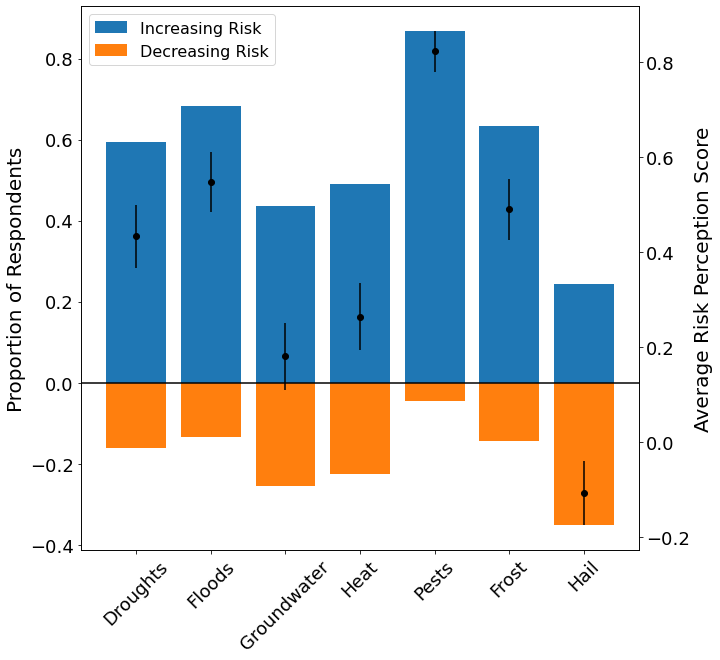

In [27]:
risk_types = len(risks)
respondents = len(std_perceptions)

higher = np.zeros(risk_types)
lower = np.zeros(risk_types)
mean = np.zeros(risk_types)
xpos = np.zeros(risk_types)
error = np.zeros(risk_types)

data = []

f, ax1 = plt.subplots(figsize=(10,10)) 

for i, name in enumerate(std_perceptions.columns[2:]):
    data.append(std_perceptions[name])
    xpos[i] = i
    higher[i] = len(std_perceptions[std_perceptions[name] == 1.0]) / respondents
    lower[i] = len(std_perceptions[std_perceptions[name] == -1.0]) / respondents
    mean[i] = std_perceptions[name].mean()
    error[i] = confint(std_perceptions[name])


print(higher)
print(lower)
print(mean)
ax1.bar(xpos, higher, label = 'Increasing Risk')
ax1.bar(xpos, -lower, label = 'Decreasing Risk')

ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=18, rotation=45)

plt.ylabel('Proportion of Respondents', size=20)
plt.yticks(size=18)
plt.axhline(y=0, color='black')
plt.legend(fontsize=16)

ax2 = ax1.twinx()

ax2.scatter(xpos, mean, color='black')
ax2.errorbar(xpos, mean, yerr=error, color='black', fmt='none')
ax2.set_ylabel('Average Risk Perception Score', size=20)

plt.yticks(size=18)
plt.xticks(size=18, rotation=45)

plt.show()
#plt.savefig('RiskPerception_Summary.png', bbox_inches='tight')

In [10]:
#Creating Total Perceptions Measure
std_perceptions['Total'] = std_perceptions['Droughts'] + std_perceptions['Floods'] + std_perceptions['Heat'] + std_perceptions['Pests'] + std_perceptions['Frost'] + std_perceptions['Hail']

std_perceptions['Total'].describe()
max_value = std_perceptions['Total'].max()
std_perceptions['TotalNorm'] = std_perceptions['Total'] / max_value
std_perceptions

discrete_perceptions = std_perceptions.iloc[:,1:-3]
discrete_perceptions['Min'] = discrete_perceptions.min(axis=1)
discrete_perceptions['Max'] = discrete_perceptions.max(axis=1)

np.count_nonzero((discrete_perceptions['Min'] == -1.0) & (discrete_perceptions['Max'] == 1.0)) / 500



0.0

In [11]:
std_perceptions['Quart'] = 0

for h in range(len(std_perceptions)):
    if std_perceptions['Total'][h] <= 0:
        std_perceptions['Quart'][h] = 1
    elif std_perceptions['Total'][h] <= 2:
        std_perceptions['Quart'][h] = 2
    elif std_perceptions['Total'][h] <= 4:
        std_perceptions['Quart'][h] = 3
    else:
        std_perceptions['Quart'][h] = 4

std_perceptions

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_59969/2405325438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 2
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_59969/2405325438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_59969/2405325438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,HHID,Subward,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart
0,2301006,2301,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2
1,2301007,2301,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1
2,2301013,2301,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1
3,2301016,2301,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3
4,2301017,2301,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3
496,2611115,2611,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4
497,2611117,2611,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1
498,2611118,2611,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2


In [30]:
#Merging with Migration Data

#Import Data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')

raw_data.replace(' ',0, inplace=True)


#This creates a new dataframe to store only the data that we want
migration = pd.DataFrame()
migration['HHID'] = raw_data['HHID']

target_columns = ['C12_', 'C13_']

#This loops over each column name in the raw_cvfs dataframe. If the column name matches one of the variables we want, then we store it in the clean_cvfs dataframe
for item in raw_data.columns:
    
    #For example, here I am saying that any variable that contains 'B11A' should be stored in our dataframe. This includes all the separate 'B11A' variables for each year.
    for col in target_columns:
        if col in item:
        
            migration[item] = raw_data[item].astype(float)

local = []
intl = []
for col in migration.columns:
    if 'C12' in col:
        local.append(col)
    elif 'C13' in col:
        intl.append(col)
        
migration['Local'] = migration[local].sum(axis=1)
migration['Intl'] = migration[intl].sum(axis=1)

for i in range(len(migration)):
    if migration['Local'][i] > 0:
        migration['Local'][i] = 1
    if migration['Intl'][i] > 0:
        migration['Intl'][i] = 1
        
migration

short_migration = migration[['HHID', 'Local', 'Intl']]

short_migration


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/1369044100.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Intl'][i] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/1369044100.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Local'][i] = 1


,HHID,Local,Intl
0,2301006,0.0,0.0
1,2301007,0.0,0.0
2,2301013,0.0,1.0
3,2301016,1.0,0.0
4,2301017,0.0,0.0
...,...,...,...
495,2611114,0.0,1.0
496,2611115,0.0,1.0
497,2611117,0.0,0.0
498,2611118,0.0,0.0


In [31]:
mig_climrisk = pd.merge(std_perceptions, short_migration, on='HHID')

mig_climrisk

,HHID,Subward,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart,Local,Intl
0,2301006,2301,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2,0.0,0.0
1,2301007,2301,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1,0.0,0.0
2,2301013,2301,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1,0.0,1.0
3,2301016,2301,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3,1.0,0.0
4,2301017,2301,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3,0.0,1.0
496,2611115,2611,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4,0.0,1.0
497,2611117,2611,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1,0.0,0.0
498,2611118,2611,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2,0.0,0.0


[1. 2. 3. 4.]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/564127864.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)


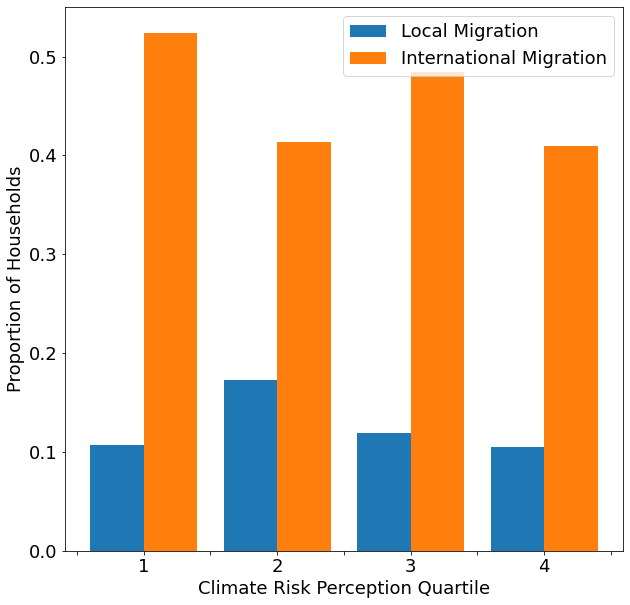

In [32]:
#Bar Plot - Risk Quartile and Migration

quart_local = np.zeros(4)
quart_intl = np.zeros(4)

for i in range(len(quart_local)):
    quart_local[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Local'].mean()
    quart_intl[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Intl'].mean()

x = np.linspace(1,4,4)
print(x)
y1 = quart_local
y2 = quart_intl

f, ax1 = plt.subplots(figsize=[10,10])
ax1.bar(x-0.2, y1, width=0.4, label='Local Migration')
ax1.bar(x+0.2, y2, width=0.4, label='International Migration')

ax1.set_ylabel('Proportion of Households', size=18)
ax1.set_xlabel('Climate Risk Perception Quartile', size=18)
ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)
ax1.set_ylim([0,0.55])
plt.yticks(size=18)
plt.legend(fontsize=18)
plt.show()

#plt.savefig('Migration_RiskQuartile.png', bbox_inches='tight')

# Summary Statistics: Salience of Risks (B4)

In [34]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')
raw_questionnaire['Subward'] = raw_questionnaire['HHID'].astype(str).str[:4].astype(int)


salience = pd.DataFrame()
salience[['HHID','Subward']] = raw_questionnaire[['HHID','Subward']]

for item in raw_questionnaire.columns:
    if 'B4' in item:
        salience[item] = raw_questionnaire[item].astype(float)

salience

,HHID,Subward,B4_1,B4_2,B4_3,B4_4,B4_5,B4_6,B4_7,B4_8,B4_9,B4_10,B4_11,B4_12,B4_13,B4_14,B4_15,B4_97,B4_97_1,B4_97_1_1
0,2301006,2301,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,-1.0,-1.0
1,2301007,2301,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,-1.0
2,2301013,2301,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
3,2301016,2301,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,-1.0,-1.0
4,2301017,2301,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,-1.0,-1.0
496,2611115,2611,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
497,2611117,2611,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
498,2611118,2611,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,0.0,-1.0,-1.0


In [35]:
#Converting column heads to descriptive names

factors = ['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious']

factor_dict = {}
for key, value in zip(salience.columns[2:-3], factors):
    factor_dict[key] = value

    
salience.rename(columns=factor_dict, inplace=True)

clean_salience = salience.iloc[:, :-3]

clean_salience



,HHID,Subward,Labour,Health,Technology,Finance,Education,Seeds,Soil,Water,Land,ShortWeather,LongWeather,Pests,Markets,Economy,Religious
0,2301006,2301,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0
1,2301007,2301,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,2301013,2301,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0
3,2301016,2301,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0
4,2301017,2301,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0
496,2611115,2611,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
497,2611117,2611,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0
498,2611118,2611,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0


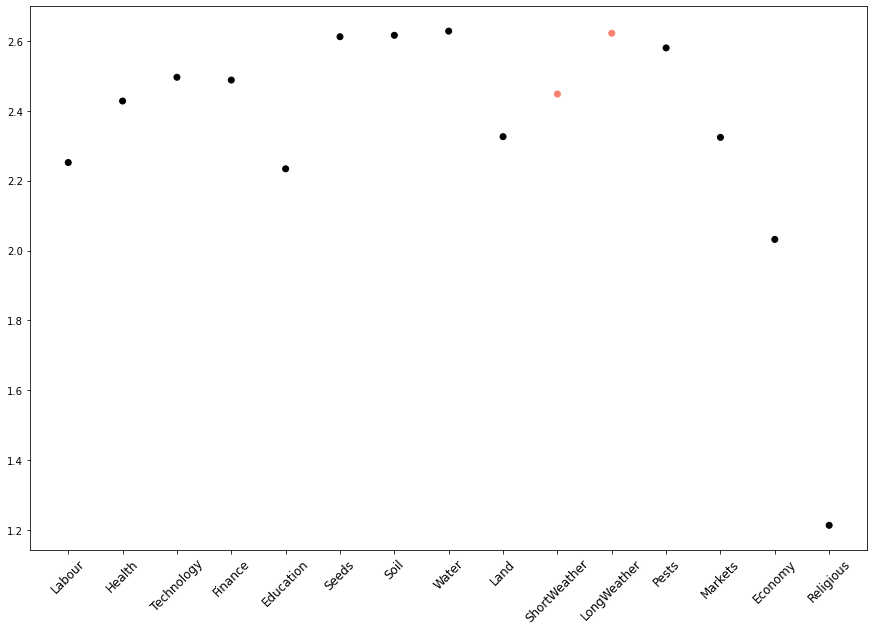

In [36]:
# Confidence Interval Plot

num_factors = len(factors)
means = np.zeros(num_factors)
error = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)
color_label = []
for f, element in enumerate(factors):
    means[f] = clean_salience[element].mean()
    error[f] = confint(clean_salience[element])
    if 'Weather' in element:
        color_label.append('salmon')
    else:
        color_label.append('black')


f, ax = plt.subplots(figsize=[15,10])
ax.scatter(xpos, means, color=color_label)
#ax.errorbar(xpos, means, yerr=error, color=color_label, fmt='none')
ax.set_xticks(xpos)
ax.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=12, rotation=45)

plt.show()


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/1449098180.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)


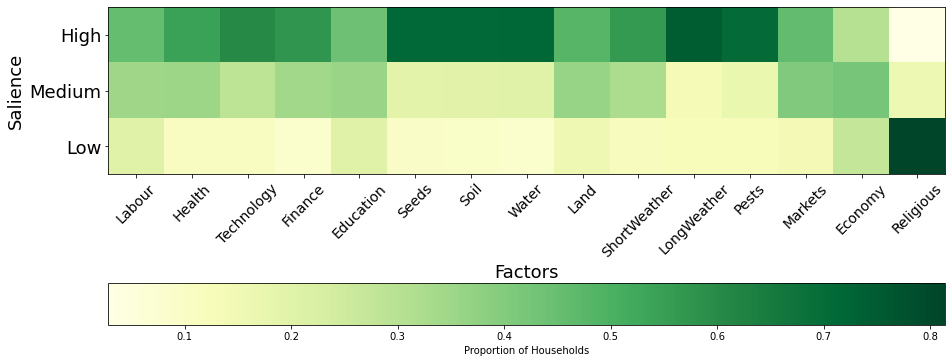

In [37]:
#Heat Map Plot

high = np.zeros(num_factors)
medium = np.zeros(num_factors)
low = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)

for f, element in enumerate(factors):
    total_responses = np.count_nonzero(clean_salience[element] > 0)
    high[f] = np.count_nonzero(clean_salience[element] == 3) / total_responses
    medium[f] = np.count_nonzero(clean_salience[element] == 2) / total_responses
    low[f] = np.count_nonzero(clean_salience[element] == 1) / total_responses
    
z = [low, medium, high]
output = np.asarray(z)

f, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xticks(xpos)
ax1.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=14, rotation=45)
ax1.set_xlabel('Factors', fontsize=18)

ax1.set_ylabel('Salience', fontsize=18)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')

plt.show()

#plt.savefig('Salience.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/1992889349.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)


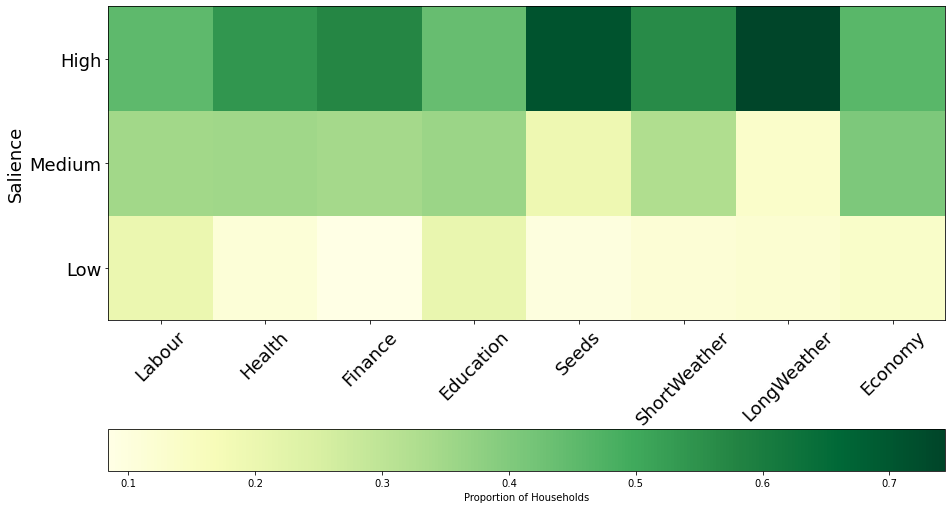

In [38]:
#Shortened Version

key_factors = [0,1,3,4,5,9, 10,12]

short_high = np.zeros(len(key_factors))
short_med = np.zeros(len(key_factors))
short_low = np.zeros(len(key_factors))
i = 0
for f, element in enumerate(factors):
    if f in key_factors:
        short_high[i]= np.count_nonzero(clean_salience[element] == 3) / total_responses
        short_med[i] = np.count_nonzero(clean_salience[element] == 2) / total_responses
        short_low[i] = np.count_nonzero(clean_salience[element] == 1) / total_responses
        i += 1


z = [short_low, short_med, short_high]
output = np.asarray(z)
x_short = np.arange(0, len(key_factors), 1)
f, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xticks(x_short)
ax1.set_xticklabels(['Labour', 'Health', 'Finance', 'Education', 'Seeds', 'ShortWeather','LongWeather','Economy'], size=18, rotation=45)
ax1.set_xlabel('Factors', fontsize=18)

ax1.set_ylabel('Salience', fontsize=18)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')

plt.show()

#plt.savefig('Short_Salience.png', bbox_inches='tight')

In [39]:
#Constructing Salience Index

background_salience = clean_salience.loc[ : , clean_salience.columns != 'LongWeather']

background_salience['Mean'] = background_salience.loc[: , background_salience.columns != 'HHID'].mean(axis=1)
clean_salience['Mean'] = background_salience['Mean']
clean_salience['Net_Salience'] = clean_salience['LongWeather'] - clean_salience['Mean']
clean_salience['Net_Salience'].describe()

clean_salience['Translate_Salience'] = clean_salience['Net_Salience'] + 2
max_value = clean_salience['Translate_Salience'].max()
clean_salience['SalienceIndex'] = clean_salience['Translate_Salience'] / max_value

clean_salience['LongWeather'].describe()

count    500.000000
mean       2.622000
std        0.692875
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: LongWeather, dtype: float64

In [48]:
#Constructing composite risk perceptions index

clean_salience[['Risk_Norm', 'Quart']] = std_perceptions[['TotalNorm', 'Quart']]
clean_salience['CompositeRisk'] = clean_salience['SalienceIndex'] * clean_salience['Risk_Norm']
final_salience = clean_salience[['HHID', 'Subward','SalienceIndex', 'Risk_Norm', 'CompositeRisk']]
final_salience.to_csv('ClimateRiskPerceptions.csv')

final_salience.Subward.unique().size


6

In [58]:
#Grouping Risk Perception Indices at Subward Level
subward_salience = final_salience.groupby('Subward')['SalienceIndex','Risk_Norm','CompositeRisk'].mean()

for col in subward_salience.columns:
    subward_salience[str(col) + 'SD'] = final_salience.groupby('Subward')[col].std()

subward_salience.to_csv('Subward_ClimateRiskPerceptions.csv')

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_52340/2829165361.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subward_salience = final_salience.groupby('Subward')['SalienceIndex','Risk_Norm','CompositeRisk'].mean()


# Information Sources and Social Networks

In [40]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

sources = pd.DataFrame()
sources['HHID'] = raw_questionnaire['HHID']
sources['Subward'] = raw_questionnaire['HHID'].astype(str).str[:4].astype(int)


for item in raw_questionnaire.columns:
    if ('F1_' in item or 'F2_' in item) and '97' not in item:
        sources[item] = raw_questionnaire[item].astype(float)
sources.replace(95, np.NaN, inplace=True)
sources.replace(98, np.NaN, inplace=True)
sources.replace(99, np.NaN, inplace=True)
sources.replace(-1, np.NaN, inplace=True)

sourcenames = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

source1_dict = {}
source2_dict = {}
for key, value in zip(sources.columns[2:14], sourcenames):
    source1_dict[key] = value
    
for key, value in zip(sources.columns[14:], sourcenames):
    source2_dict[key] = value + 'Trust'
    
sources.rename(columns=source1_dict, inplace=True)
sources.rename(columns=source2_dict, inplace=True)
percep_df = std_perceptions[['HHID', 'Subward', 'Total']]

bubble_df = pd.merge(sources, percep_df, on='HHID')

bubble_df['ScientistTrust'].describe()

sources

,HHID,Subward,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,...,NewspapersTrust,AgExtensionTrust,VeterinarianTrust,MigrantLaborTrust,OtherGovTrust,LocalFriendTrust,DistantFriendTrust,ReligiousTrust,ScientistTrust,SocialMediaTrust
0,2301006,2301,4.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,1.0
1,2301007,2301,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2301013,2301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,2301016,2301,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,2301017,2301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
496,2611115,2611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
497,2611117,2611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN
498,2611118,2611,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,...,NaN,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN


In [41]:
#Plot Source Frequency and Trust
x = np.zeros(len(sourcenames))
for i, key in enumerate(bubble_df.columns[2:14]):
    x[i] = bubble_df.loc[bubble_df[key] > 0][key].mean()

y = np.zeros(len(sourcenames))
for j, key in enumerate(bubble_df.columns[14:26]):
    y[j] = bubble_df[key].mean()

s = np.zeros(len(sourcenames))
for k, key in enumerate(bubble_df.columns[2:14]):
    s[k] = np.count_nonzero(bubble_df[key]) / 500
print(s)
max_size = np.max(s)
s_std = np.zeros(len(sourcenames))
for k, key in enumerate(bubble_df.columns[2:13]):
    s_std[k] = s[k] / max_size * 100

risk = np.zeros(len(sourcenames))
for l, key in enumerate(bubble_df.columns[2:14]):
    risk[l] = bubble_df.loc[sources[key] > 1]['Total'].mean()

print(risk)

plot_df = pd.DataFrame()
plot_df['Source'] = sourcenames
plot_df['Frequency'] = x
plot_df['Trust'] = y
plot_df['Proportion'] = s * 500
plot_df['Risk Perception'] = risk

plot_df


[0.402 0.476 0.146 0.226 0.192 0.13  0.136 0.912 0.632 0.066 0.028 0.586]
[2.29310345 2.44966443 2.48571429 2.12195122 1.41666667 2.16666667
 1.79166667 2.55154639 2.55021834 1.23076923 3.         2.38461538]


,Source,Frequency,Trust,Proportion,Risk Perception
0,Radio,2.179104,2.373134,201.0,2.293103
1,Television,2.172269,2.378151,238.0,2.449664
2,Newspapers,1.863014,2.397260,73.0,2.485714
3,AgExtension,1.460177,2.433628,113.0,2.121951
4,Veterinarian,1.291667,2.447917,96.0,1.416667
5,MigrantLabor,1.523077,1.907692,65.0,2.166667
6,OtherGov,1.426471,2.338235,68.0,1.791667
7,LocalFriend,2.725275,2.402198,456.0,2.551546
8,DistantFriend,2.231013,2.367089,316.0,2.550218
9,Religious,1.636364,2.272727,33.0,1.230769


In [39]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


import plotly.express as px
df = plot_df

fig = px.scatter(df, x="Frequency", y="Trust",
	         size="Proportion", color="Risk Perception",
                 hover_name="Source", size_max=75)

fig.update_layout(
yaxis = dict(
tickfont = dict(size=24)))

fig.update_yaxes(title_font=dict(size=24))

fig.update_layout(
xaxis = dict(
tickfont = dict(size=1)))

fig.update_xaxes(title_font=dict(size=24))

fig.update_layout(
    font=dict(
        
        size=20,  # Set the font size her
    )
)



fig.show()




In [86]:
#Creating Dummy Variables for Sources consulted at least monthly

narrow_sources = pd.DataFrame()

narrow_sources[['HHID','Subward']] = sources[['HHID','Subward']]
        

sourcenames = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

for item in sources.columns:
    if item in sourcenames:
        narrow_sources[item] = sources[item].astype(float)
        
source_dict = {}
for key, value in zip(narrow_sources.columns[2:14], sourcenames):
    source_dict[key] = value
    
narrow_sources.rename(columns=source_dict, inplace=True)

#Creating Total Source Index
narrow_sources['SourceNumber'] = narrow_sources.gt(0).sum(axis=1) - 2 #Accounting for HHID and Subward, which will be greater than 1
mean_value = narrow_sources['SourceNumber'].mean()
std_value = np.std(narrow_sources['SourceNumber'])
print(std_value)
narrow_sources['SourceIndex'] = (narrow_sources['SourceNumber'] - mean_value) / std_value


narrow_sources['PublicSources'] = np.where((narrow_sources['AgExtension'] > 0) | (narrow_sources['OtherGov'] > 0) ,1,0)

narrow_sources.to_csv('Information.csv')

narrow_sources


2.1691242472481824


,HHID,Subward,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,Religious,Scientist,SocialMedia,SourceNumber,SourceIndex,PublicSources
0,2301006,2301,4.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,5,0.493287,0
1,2301007,2301,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,0.0,0.0,1,-1.350776,0
2,2301013,2301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,-1.350776,0
3,2301016,2301,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2,-0.889760,0
4,2301017,2301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3,-0.428744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2611,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,5,0.493287,0
496,2611115,2611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1,-1.350776,0
497,2611117,2611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3,-0.428744,0
498,2611118,2611,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3,-0.428744,0


In [87]:
#Creating subward averages for each source
subward_sources = pd.DataFrame()
logical_sources = pd.DataFrame()
logical_sources[['HHID','Subward']] = narrow_sources[['HHID','Subward']]
sourcenames = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

for key in sourcenames:
    logical_sources[key] = narrow_sources[key].gt(0)
    subward_sources[key] = logical_sources.groupby('Subward')[key].sum() / (logical_sources.groupby('Subward').size())
    

#subward_sources['Radio'] = logical_sources.groupby('Subward')['Radio'].count()
subward_sources.reset_index().to_csv('Subward_InfoSources.csv')

## ANOVA Test for influence of public sources

In [35]:
#Anova Test for influence of public sources
anova_df = pd.merge(narrow_sources, percep_df, on='HHID')
anova_df.dropna(inplace=True)
public_sources = anova_df.loc[narrow_sources['PublicSources'] == 1]

nonpublic_sources = anova_df.loc[narrow_sources['PublicSources'] == 0]



<class 'pandas.core.series.Series'>


In [36]:
from scipy.stats import f_oneway

public = np.array(public_sources['Total'])
nonpublic = np.array(nonpublic_sources['Total'])

print(nonpublic)
f_oneway(public, nonpublic)



[ 1.  0.  3.  2.  1. -1.  0.  4.  4.  2. -2.  4.  6.  0. -2.  4.  1.  2.
  1. -1.  4.  1.  2. -2.  0.  2.  2.  1.  2.  4.  6.  2.  6.  3.  6.  2.
  6.  6.  6.  2.  0.  4. -1.  4.  2.  5.  2.  2. -2.  3.  4.  0.  3.  3.
  3.  3.  5.  3. -1.  4.  1.  1.  2.  2.  6.  4.  6.  6.  4.  3.  0.  5.
  2.  0.  3.  5.  1.  2.  6.  5.  1.  2.  6.  5.  4.  5.  6.  3.  1.  3.
  6.  4.  0.  6.  5.  6.  2.  0.  6.  0.  5.  4.  2.  4.  5. -1.  3.  5.
  3.  1.  6.  5.  3.  4.  2.  1.  3.  1.  5.  4.  5.  5.  4.  6.  3.  6.
  6.  1.  5. -1.  5.  0.  1.  3.  4.  4.  3.  1. -4.  1.  1.  4.  3.  3.
  1.  4.  3.  6.  4. -2. -4.  2.  5. -2.  4.  1.  2.  3.  3.  1.  2.  6.
  3.  5. -2.  2.  2.  1.  1.  4.  0.  1.  6.  6.  2.  5.  5.  3.  3.  2.
  4.  2.  0.  3.  4.  3.  5.  3.  4.  0. -2.  2.  1.  1.  3.  0.  2.  2.
  2.  3.  1.  3.  3. -2.  5.  6.  2.  2.  6.  3.  5.  3.  4.  1.  5.  4.
  4.  4.  4.  2.  3.  2.  5.  5.  5. -1.  1.  6.  2.  6.  4.  6.  5. -2.
  0. -2.  4.  5. -6.  5.  5.  4.  6. -2.  0.  3.  5

F_onewayResult(statistic=1.0451585256925018, pvalue=0.3071231203013127)

In [35]:
monthly_sources = narrow_sources.drop(narrow_sources.columns[13:], axis=1)
for col in monthly_sources.columns[1:13]:
    monthly_sources[col] = np.where(narrow_sources[col] > 1, 1,0)

monthly_sources

,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,Religious,Scientist,SocialMedia
0,2301006,1,1,0,0,0,0,0,1,0,0,0,1
1,2301007,0,0,0,0,0,1,0,0,0,0,0,0
2,2301013,0,0,0,0,0,0,0,1,0,0,0,0
3,2301016,0,1,0,0,0,0,0,1,0,0,0,0
4,2301017,0,0,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1,1,0,0,0,0,0,1,1,0,0,1
496,2611115,0,0,0,0,0,0,0,1,0,0,0,0
497,2611117,0,0,0,0,0,0,0,0,1,0,0,0
498,2611118,0,0,0,0,1,0,0,1,1,0,0,0


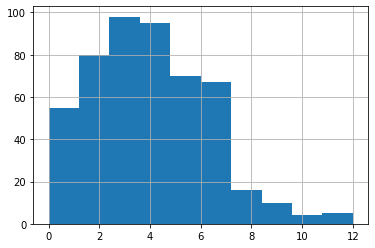

8.0


In [65]:

narrow_sources['SourceNumber'].hist()
plt.show()

print(np.percentile(narrow_sources['SourceNumber'], 95))

In [14]:
#Creating Groups Index

groups = pd.DataFrame()

groups['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'G1_' in item:
        groups[item] = raw_questionnaire[item].astype(float)

narrow_groups = pd.DataFrame()
for col in groups.columns[0:8]:
    narrow_groups[col] = groups[col]

groupnames = ["Women", "Youth", "FarmCoop", "Livestock", "Migrants", "CFUG", "Lending"]

group_dict = {}
for key, value in zip(narrow_groups.columns[1:8], groupnames):
    group_dict[key] = value
    
narrow_groups.rename(columns=group_dict, inplace=True)

dummy_groups = pd.DataFrame()
dummy_groups['HHID'] = narrow_groups['HHID']

for col in narrow_groups.columns[1:8]:
    dummy_groups[col] = narrow_groups[col]
    for i in range(len(narrow_groups)):
        if narrow_groups[col][i] > 11 and narrow_groups[col][i] < 90:
            dummy_groups[col][i] = 1
        else:
            dummy_groups[col][i] = 0

dummy_groups['GroupNumber'] = dummy_groups.gt(0).sum(axis=1) - 1 #Accounting for HHID, which will be greater than 1

mean_value = np.mean(dummy_groups['GroupNumber'])
std_value = np.std(dummy_groups['GroupNumber'])
print(std_value)
dummy_groups['GroupIndex'] = (dummy_groups['GroupNumber'] - mean_value) / std_value
dummy_groups.to_csv('SocialNetworks.csv')
dummy_groups['GroupNumber'].describe()



/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_202/3329668866.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_groups[col][i] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_202/3329668866.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_groups[col][i] = 0
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_202/3329668866.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_gr

1.0588975398970382


count    500.000000
mean       1.356000
std        1.059958
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: GroupNumber, dtype: float64

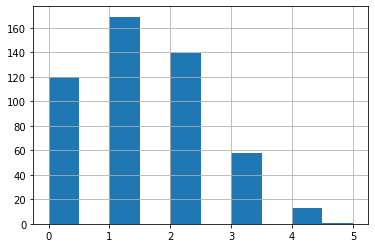

3.0


In [52]:
dummy_groups['GroupNumber'].hist()
plt.show()

print(np.percentile(dummy_groups['GroupNumber'], 95))

In [53]:
group_df = pd.merge(narrow_groups, percep_df, on='HHID')

group_df['GroupNumber'] = dummy_groups['GroupNumber']

for col in group_df.columns[1:8]:
    for i in range(len(narrow_groups)):
        if group_df[col][i] > 94:
            group_df[col][i] = 0
group_df.dropna()



/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/2915194055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df[col][i] = 0


,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,Total,GroupNumber
0,2301006,12.0,12.0,0.0,0.0,0.0,12.0,0.0,1.0,3
1,2301007,12.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,2
2,2301013,0.0,2.0,0.0,0.0,0.0,12.0,1.0,0.0,1
3,2301016,12.0,0.0,0.0,0.0,0.0,12.0,12.0,3.0,3
4,2301017,12.0,0.0,12.0,0.0,0.0,1.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0
496,2611115,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0
497,2611117,12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [56]:
#Plot Group Frequency and Risk Perceptions



x = np.zeros(len(groupnames))
for i, key in enumerate(group_df.columns[1:8]):
    x[i] = group_df.loc[group_df[key] > 0][key].mean()

y = np.zeros(len(groupnames))
for j, key in enumerate(group_df.columns[1:8]):
    y[j] = np.average(group_df.loc[group_df[key] > 0]['GroupNumber']) - 1

s = np.zeros(len(groupnames))
for k, key in enumerate(group_df.columns[1:8]):
    s[k] = np.count_nonzero(group_df[key]) / 499
print(s)
max_size = np.max(s)
s_std = np.zeros(len(groupnames))
for k, key in enumerate(group_df.columns[1:8]):
    s_std[k] = s[k] / max_size * 100

risk = np.zeros(len(groupnames))
for l, key in enumerate(group_df.columns[1:8]):
    risk[l] = group_df.loc[group_df[key] > 1]['Total'].mean()

print(risk)

plot_df = pd.DataFrame()
plot_df['Group'] = groupnames
plot_df['Frequency (Meetings/yr)'] = x
plot_df['Avg Number of Other Groups'] = y
plot_df['Proportion'] = s * 500
plot_df['Risk Perception'] = risk

plot_df.dropna(inplace=True)

plot_df

[0.75751503 0.1503006  0.45290581 0.10821643 0.00200401 0.44488978
 0.29258517]
[2.38586957 2.20833333 2.63874346 2.25              nan 2.46327684
 2.40186916]


,Group,Frequency (Meetings/yr),Avg Number of Other Groups,Proportion,Risk Perception
0,Women,12.645503,0.666667,378.757515,2.385870
1,Youth,8.640000,1.146667,75.150301,2.208333
2,FarmCoop,8.575221,0.858407,226.452906,2.638743
3,Livestock,4.518519,0.925926,54.108216,2.250000
5,CFUG,6.626126,0.720721,222.444890,2.463277
6,Lending,7.369863,0.780822,146.292585,2.401869


In [48]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


import plotly.express as px
df = plot_df

fig = px.scatter(df, x="Frequency (Meetings/yr)", y="Avg Number of Other Groups",
	         size="Proportion", color="Risk Perception",
                 hover_name="Group", size_max=75)

fig.show()


# Basic Respondent Info

In [55]:
house_info = pd.DataFrame()

raw_questionnaire = pd.read_csv('ClimateChangeData.csv')
house_info = raw_questionnaire[['HHID', 'H1', 'H2']]

census_data = pd.read_csv('CensusData.csv')

census_data


,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste
0,2301006,0:10,4,10,1,0,3,PII,4,0,0,-1,0,-1,1
1,2301006,0:10,2,40,1,1,9,0,5,0,0,-1,N56,2069-02,1
2,2301006,0:10,1,43,0,1,9,0,2,1,0,-1,0,-1,1
3,2301006,0:10,3,17,0,0,10,PII,4,0,0,-1,0,-1,1
4,2301007,0:10,1,55,1,1,3,0,5,1,0,-1,N67,2059-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2611119,0:24,4,36,1,1,12,0,2,1,N01,2062-07,N85,2064-08,3
2385,2611119,0:24,3,41,0,1,16,0,2,1,N01,2057-12,0,-1,3
2386,2611119,0:24,7,34,0,1,16,0,2,0,N12,2071-01,0,-1,3
2387,2611119,0:24,6,4,0,0,NS,PII,4,0,N01,2075-05,0,-1,3


In [56]:
#Isolating respondent info
respondent_info = census_data.loc[census_data['SN'] == 1]

respondent_info

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste
2,2301006,0:10,1,43,0,1,9,0,2,1,0,-1,0,-1,1
4,2301007,0:10,1,55,1,1,3,0,5,1,0,-1,N67,2059-01,1
9,2301013,0:06,1,49,1,1,0,0,6,0,0,-1,0,-1,3
11,2301016,0:15,1,55,1,1,0,0,5,0,0,-1,0,-1,1
22,2301017,0:05,1,47,1,1,10,0,5,0,0,-1,N56,2049-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2611114,0:11,1,47,0,1,0,0,3,1,0,-1,N56,2074-03,6
2367,2611115,0:10,1,36,1,1,5,0,5,1,0,-1,0,-1,6
2372,2611117,0:09,1,44,1,1,0,0,5,1,0,-1,F091,2052,3
2376,2611118,0:04,1,56,1,1,0,0,5,1,0,-1,N56,2041-01,3


In [59]:
#Creating categorical variables for some secondary school attainment and caste types
respondent_info['Secondary'] = np.where(respondent_info['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    respondent_info[c] = np.where(respondent_info['Caste'] == (i+1), 1,0)
    
respondent_info.to_csv('Demographics.csv')
respondent_info

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/741544511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondent_info['Secondary'] = np.where(respondent_info['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/741544511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondent_info[c] = np.where(respondent_info['Caste'] == (i+1), 1,0)


,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,BirthPlace,MoveHereYear,Caste,Secondary,Brahmin-Chetri,Gurung-Magar-Tamang,Dalit,Newar,Tharu-Darai-Kumal,Other
2,2301006,0:10,1,43,0,1,9,0,2,1,...,0,-1,1,1,1,0,0,0,0,0
4,2301007,0:10,1,55,1,1,3,0,5,1,...,N67,2059-01,1,0,1,0,0,0,0,0
9,2301013,0:06,1,49,1,1,0,0,6,0,...,0,-1,3,0,0,0,1,0,0,0
11,2301016,0:15,1,55,1,1,0,0,5,0,...,0,-1,1,0,1,0,0,0,0,0
22,2301017,0:05,1,47,1,1,10,0,5,0,...,N56,2049-06,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2611114,0:11,1,47,0,1,0,0,3,1,...,N56,2074-03,6,0,0,0,0,0,0,1
2367,2611115,0:10,1,36,1,1,5,0,5,1,...,0,-1,6,0,0,0,0,0,0,1
2372,2611117,0:09,1,44,1,1,0,0,5,1,...,F091,2052,3,0,0,0,1,0,0,0
2376,2611118,0:04,1,56,1,1,0,0,5,1,...,N56,2041-01,3,0,0,0,1,0,0,0


In [57]:
exchange_rate = 1 / 125 #Approximate exchange rate in May 2022, during time of data collection
house_info['Log_Income'] = np.log(house_info['H2'])
np.count_nonzero(house_info['H2'] >= 1000000) / 500

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1836282376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_info['Log_Income'] = np.log(house_info['H2'])


0.032

# Climate Data

In [117]:
spei_data = pd.DataFrame()

spei_data = pd.read_csv('Data/SPEI_27.75_84.25.csv')

spei03 = spei_data[['DATA', 'SPEI_3']]
start_date = 759 #Index for April 2013, first month of Nepali Year 2070 (2 years before calendar data)
timehorizon = 9 * 12 #End of Nepali year 2078 is April 2022
end_date = start_date + timehorizon

spei03_time = spei03[start_date:end_date]

spei03_time

,DATA,SPEI_3
759,Apr2013,0.81887
760,May2013,1.15322
761,Jun2013,1.56373
762,Jul2013,0.31788
763,Aug2013,-1.16400
...,...,...
862,Nov2021,-0.63905
863,Dec2021,1.09034
864,Jan2022,0.67670
865,Feb2022,1.57778


In [118]:
#Calculating average SPEI for rice and maize growing seasons, according to FAO Crop Calendar for Nepal Terai region: https://cropcalendar.apps.fao.org/#/home?id=NP&crops=0338,0113

rice_sowing = 1 #First instance of May in spei03_time
rice_harvest = 5 #Index for first instance of Sept

maize_sowing = 7 #Index for Nov.
maize_harvest = 12 #Index for March

years = np.arange(0, 9, 1)

rice_spei = np.zeros(len(years))
maize_spei = np.zeros(len(years))

for y in years:
    rice_spei[y] = np.average(spei03_time['SPEI_3'][rice_sowing + 12*y:rice_harvest + 12*y])
    maize_spei[y] = np.average(spei03_time['SPEI_3'][maize_sowing + 12*y:maize_harvest + 12*y])                         
                        
print(rice_spei)
print(maize_spei)

[ 0.4677075 -1.29173   -1.3790125 -1.17149   -0.74029   -0.7550525
 -1.6936725  0.79596    1.3974825]
[ 0.3031    0.76527  -1.86876  -0.023868 -1.510392 -0.380582  0.912888
 -1.270394  0.573058]


In [120]:
#Creating dataframe with Nepali Year and SPEI values
data = {'Year': [], 'RiceSPEI':[], 'MaizeSPEI': [], 'RiceSPEI_1yearlag':[], 'MaizeSPEI_1yearlag': [], 'RiceSPEI_2yearlag':[], 'MaizeSPEI_2yearlag':[]}
years = [72, 73, 74, 75, 76, 77, 78]

for i, y in enumerate(years):
    data['Year'].append(y)
    data['RiceSPEI'].append(rice_spei[i+2])
    data['MaizeSPEI'].append(maize_spei[i+2])
    data['MaizeSPEI_1yearlag'].append(rice_spei[i+1])
    data['RiceSPEI_1yearlag'].append(maize_spei[i+1])
    data['RiceSPEI_2yearlag'].append(rice_spei[i])
    data['MaizeSPEI_2yearlag'].append(maize_spei[i])
    

climate_df = pd.DataFrame(data)
climate_df

,Year,RiceSPEI,MaizeSPEI,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag
0,72,-1.379012,-1.868760,0.765270,-1.291730,0.467707,0.303100
1,73,-1.171490,-0.023868,-1.868760,-1.379012,-1.291730,0.765270
2,74,-0.740290,-1.510392,-0.023868,-1.171490,-1.379012,-1.868760
3,75,-0.755053,-0.380582,-1.510392,-0.740290,-1.171490,-0.023868
4,76,-1.693672,0.912888,-0.380582,-0.755053,-0.740290,-1.510392
5,77,0.795960,-1.270394,0.912888,-1.693672,-0.755053,-0.380582
6,78,1.397482,0.573058,-1.270394,0.795960,-1.693672,0.912888


In [121]:
#Converting SPEI indices to dummy variables for drought
dummies = ['RiceDrought', 'MaizeDrought', 'RiceDrought_1yearlag', 'MaizeDrought_1yearlag', 'RiceDrought_2yearlag', 'MaizeDrought_2yearlag']
drought_threshold = -1
for d, col in zip(dummies, climate_df.columns[1:]):
    climate_df[d] = np.where(climate_df[col] < drought_threshold, 1, 0)

climate_df



,Year,RiceSPEI,MaizeSPEI,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag,RiceDrought,MaizeDrought,RiceDrought_1yearlag,MaizeDrought_1yearlag,RiceDrought_2yearlag,MaizeDrought_2yearlag
0,72,-1.379012,-1.868760,0.765270,-1.291730,0.467707,0.303100,1,1,0,1,0,0
1,73,-1.171490,-0.023868,-1.868760,-1.379012,-1.291730,0.765270,1,0,1,1,1,0
2,74,-0.740290,-1.510392,-0.023868,-1.171490,-1.379012,-1.868760,0,1,0,1,1,1
3,75,-0.755053,-0.380582,-1.510392,-0.740290,-1.171490,-0.023868,0,0,1,0,1,0
4,76,-1.693672,0.912888,-0.380582,-0.755053,-0.740290,-1.510392,1,0,0,0,0,1
5,77,0.795960,-1.270394,0.912888,-1.693672,-0.755053,-0.380582,0,1,0,1,0,0
6,78,1.397482,0.573058,-1.270394,0.795960,-1.693672,0.912888,0,0,1,0,1,0


# Econometric Models - Null Model

In [91]:
#Creating dataframe
nullmodel = pd.DataFrame()

risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

rename_exposure = pd.DataFrame()
rename_exposure['HHID'] = narrow_exposure['HHID']
rename_exposure['HazardIndex'] = narrow_exposure['HazardIndex']

for col in narrow_exposure.columns[1:-1]:
    rename_exposure[col+'Exp'] = narrow_exposure[col]




merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, risk_df, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, adaptation, on='HHID')
nullmodel = merge6.dropna()
nullmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies
0,2301006,0:10,1,43,0,1,9,0,2,1,...,0,0,0,0,0,1,0,1,0,0
2,2301013,0:06,1,49,1,1,0,0,6,0,...,0,0,0,0,0,0,0,1,0,0
3,2301016,0:15,1,55,1,1,0,0,5,0,...,0,0,0,0,0,1,0,1,0,0
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0,0,0,0,0,1,0,1,0,0
5,2301021,0:10,1,65,0,1,10,0,5,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0:11,1,47,0,1,0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
496,2611115,0:10,1,36,1,1,5,0,5,1,...,0,0,0,1,0,0,0,0,0,1
497,2611117,0:09,1,44,1,1,0,0,5,1,...,0,0,0,0,0,0,0,1,1,0
498,2611118,0:04,1,56,1,1,0,0,5,1,...,0,0,0,0,0,0,0,1,0,0


In [92]:
#Creating categorical variables for some secondary school attainment and caste types
nullmodel['Secondary'] = np.where(nullmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    nullmodel[c] = np.where(nullmodel['Caste'] == (i+1), 1,0)
    
nullmodel['Secondary*Group'] = nullmodel['Secondary'] * nullmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullmodel['Secondary'] = np.where(nullmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullmodel[c] = np.where(nullmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:7: SettingWithCopyWarning: 
A value is tryi

In [93]:
#Linear regression for climate risk perceptions

y = nullmodel['CompositeRisk']
x_1 = nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'SourceIndex', 'Secondary*Group', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.022
Date:                Thu, 20 Oct 2022   Prob (F-statistic):             0.0209
Time:                        17:01:37   Log-Likelihood:                -15.245
No. Observations:                 498   AIC:                             56.49
Df Residuals:                     485   BIC:                             111.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2964      0.078      3.805      0.000       0.143       0.449
Gender                 -0.0251      0.027     -0.917      0.360      -0.079       0.029
Age                     0.0004      0.001      0.359      0.720      -0.002       0.003
Secondary              -0.0228      0.029     -0.790      0.430      -0.079       0.034
Gurung-Magar-Tamang    -0.0407      0.038     -1.077      0.282      -0.115       0.034
Dalit                  -0.1114      0.037     -3.022      0.003      -0.184      -0.039
Newar                  -0.0315      0.087     -0.361      0.718      -0.202       0.140
Tharu-Darai-Kumal      -0.0431      0.029     -1.473      0.142      -0.101       0.014
Other                  -0.0133      0.066     -0.203      0.840      -0.142       0.115
HazardIndex             0.0328      0.012      2.731      0.007       0.009       0.056
SourceIndex            -0.0162      0.012     -1.343      0.180      -0.040       0.007
Secondary*Group         0.0143      0.023      0.608      0.544      -0.032       0.060
GroupIndex             -0.0033      0.018     -0.184      0.854      -0.039       0.032
==============================================================================
Omnibus:                       16.574   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.901
Skew:                          -0.400   Prob(JB):                     0.000130
Kurtosis:                       3.471   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(nullmodel['Groundwater'],
                        nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'Groundwater_LackExp', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
table = res_log.summary().tables[1]
table

KeyError: 'Groundwater'

In [69]:

print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
print(latextable.draw_latex(table, caption='A comparison of rocket features.'))

TypeError: 'module' object is not callable

In [142]:
#Adaptation Strategies Model
mod_prob = OrderedModel(nullmodel['LivelihoodStrategies'],
                        nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'GroupIndex', 'SourceIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
table = res_log.summary().tables[1]
table

Optimization terminated successfully.
         Current function value: 0.424922
         Iterations: 75
         Function evaluations: 80
         Gradient evaluations: 80


,coef,std err,z,P>|z|,[0.025,0.975]
Gender,0.3040,0.299,1.016,0.310,-0.282,0.890
Age,-0.0147,0.013,-1.160,0.246,-0.040,0.010
Secondary,-0.0514,0.312,-0.165,0.869,-0.663,0.560
Gurung-Magar-Tamang,-0.8398,0.520,-1.615,0.106,-1.859,0.180
Dalit,-0.6993,0.470,-1.488,0.137,-1.620,0.222
Newar,-0.2147,1.101,-0.195,0.845,-2.373,1.943
Tharu-Darai-Kumal,0.4501,0.297,1.518,0.129,-0.131,1.031
Other,0.1243,0.711,0.175,0.861,-1.269,1.518
HazardIndex,0.3747,0.128,2.938,0.003,0.125,0.625
GroupIndex,-0.1563,0.131,-1.191,0.234,-0.413,0.101


## Livelihoods Model

In [75]:
#Livelihoods Model

livelihoodsmodel = pd.DataFrame()

risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

rename_exposure = pd.DataFrame()
rename_exposure['HHID'] = narrow_exposure['HHID']
rename_exposure['HazardIndex'] = narrow_exposure['HazardIndex']

for col in narrow_exposure.columns[1:-1]:
    rename_exposure[col+'Exp'] = narrow_exposure[col]


merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, std_perceptions, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, mean_incomeblock_prop, on='HHID')
livelihoodsmodel = merge6.dropna()
livelihoodsmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,CFUG,Lending,GroupNumber,GroupIndex,Total_Prop,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop
0,2301006,0:10,1,43,0,1,9,0,2,1,...,1.0,0.0,3,1.552558,1.0,0.037908,0.082035,0.000000,0.142629,0.737428
2,2301013,0:06,1,49,1,1,0,0,6,0,...,1.0,0.0,1,-0.336199,1.0,0.000000,0.178982,0.821018,0.000000,0.000000
3,2301016,0:15,1,55,1,1,0,0,5,0,...,1.0,1.0,3,1.552558,1.0,0.000000,0.054608,0.000000,0.716580,0.228811
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0.0,0.0,2,0.608180,1.0,0.293564,0.000000,0.000000,0.706436,0.000000
5,2301021,0:10,1,65,0,1,10,0,5,0,...,1.0,0.0,2,0.608180,1.0,0.023474,0.056765,0.469484,0.000000,0.450277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0:11,1,47,0,1,0,0,3,1,...,0.0,0.0,0,-1.280577,1.0,0.027119,0.013251,0.360555,0.599076,0.000000
496,2611115,0:10,1,36,1,1,5,0,5,1,...,0.0,0.0,0,-1.280577,1.0,0.036643,0.130805,0.170430,0.498509,0.163613
497,2611117,0:09,1,44,1,1,0,0,5,1,...,0.0,0.0,1,-0.336199,1.0,0.112423,0.356164,0.000000,0.531412,0.000000
498,2611118,0:04,1,56,1,1,0,0,5,1,...,0.0,0.0,0,-1.280577,1.0,0.490566,0.000000,0.000000,0.471698,0.037736


In [107]:
std_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2


In [103]:
#Creating categorical variables for some secondary school attainment and caste types
livelihoodsmodel['Secondary'] = np.where(livelihoodsmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    livelihoodsmodel[c] = np.where(livelihoodsmodel['Caste'] == (i+1), 1,0)
    
livelihoodsmodel['Secondary*Group'] = livelihoodsmodel['Secondary'] * livelihoodsmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livelihoodsmodel['Secondary'] = np.where(livelihoodsmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livelihoodsmodel[c] = np.where(livelihoodsmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:7: SettingWithC

In [114]:
#Livelihoods Model
y = livelihoodsmodel['Off-Farm Labor_Prop']
x_1 = livelihoodsmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'SourceIndex', 'HazardIndex', 'GroupIndex', 'Quart']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
#est.summary()

table = res_log.summary().tables[1]
table

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.6601,0.114,5.773,0.000,0.435,0.885
Gender,-0.0803,0.038,-2.125,0.034,-0.155,-0.006
Age,-0.0047,0.002,-2.992,0.003,-0.008,-0.002
Secondary,-0.1007,0.040,-2.520,0.012,-0.179,-0.022
Gurung-Magar-Tamang,0.0104,0.052,0.198,0.843,-0.092,0.113
Dalit,-0.0177,0.051,-0.345,0.730,-0.119,0.083
Newar,0.1645,0.121,1.365,0.173,-0.072,0.401
Tharu-Darai-Kumal,0.0278,0.040,0.686,0.493,-0.052,0.107
Other,0.1425,0.090,1.581,0.115,-0.035,0.320
SourceIndex,-0.0280,0.017,-1.678,0.094,-0.061,0.005


In [152]:
print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
#print(latextable.draw_latex(table))

-------------------  -------  -------  ------  -----  ------  ------
                     coef     std err  t       P>|t|  [0.025  0.975]
const                0.6601   0.114    5.773   0.000  0.435   0.885
Gender               -0.0803  0.038    -2.125  0.034  -0.155  -0.006
Age                  -0.0047  0.002    -2.992  0.003  -0.008  -0.002
Secondary            -0.1007  0.040    -2.520  0.012  -0.179  -0.022
Gurung-Magar-Tamang  0.0104   0.052    0.198   0.843  -0.092  0.113
Dalit                -0.0177  0.051    -0.345  0.730  -0.119  0.083
Newar                0.1645   0.121    1.365   0.173  -0.072  0.401
Tharu-Darai-Kumal    0.0278   0.040    0.686   0.493  -0.052  0.107
Other                0.1425   0.090    1.581   0.115  -0.035  0.320
SourceIndex          -0.0280  0.017    -1.678  0.094  -0.061  0.005
HazardIndex          -0.0452  0.017    -2.713  0.007  -0.078  -0.012
GroupIndex           -0.0230  0.017    -1.377  0.169  -0.056  0.010
Quart                -0.0098  0.015    -0.

## Livelihood Incomes by Year

In [122]:
#Calculating proportional incomes by household*year

temporal_prop = pd.DataFrame()
temporal_prop[['HHID', 'Year']] = income_blocks[['HHID', 'Year']]

for col in income_blocks.columns[2:]:
    temporal_prop[col + '_Prop'] = income_blocks[col] / income_blocks['Total']
    
temporal_prop

,HHID,Year,Total_Prop,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop
0,2301006,72,1.0,0.064935,0.311688,0.000000,0.311688,0.311688
1,2301007,72,1.0,0.000000,0.121951,0.000000,0.878049,0.000000
2,2301013,72,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
3,2301016,72,1.0,0.000000,0.052823,0.000000,0.728597,0.218579
4,2301017,72,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3495,2611114,78,1.0,0.030303,0.015152,0.000000,0.954545,0.000000
3496,2611115,78,1.0,0.022449,0.218367,0.000000,0.612245,0.146939
3497,2611117,78,1.0,0.108108,0.351351,0.000000,0.540541,0.000000
3498,2611118,78,1.0,0.403509,0.000000,0.000000,0.385965,0.210526


In [160]:
#Merging temporal income with hh-level attributes

merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, risk_df, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, temporal_prop, on='HHID')
merge7 = pd.merge(merge6, climate_df, on='Year')
temporalmodel = merge7.dropna()
temporalmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag,RiceDrought,MaizeDrought,RiceDrought_1yearlag,MaizeDrought_1yearlag,RiceDrought_2yearlag,MaizeDrought_2yearlag
0,2301006,0:10,1,43,0,1,9,0,2,1,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
2,2301013,0:06,1,49,1,1,0,0,6,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
3,2301016,0:15,1,55,1,1,0,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
5,2301021,0:10,1,65,0,1,10,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,0:11,1,47,0,1,0,0,3,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3496,2611115,0:10,1,36,1,1,5,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3497,2611117,0:09,1,44,1,1,0,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3498,2611118,0:04,1,56,1,1,0,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0


In [161]:
#Creating categorical variables for some secondary school attainment and caste types
temporalmodel['Secondary'] = np.where(temporalmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    temporalmodel[c] = np.where(temporalmodel['Caste'] == (i+1), 1,0)
    
temporalmodel['Secondary*Group'] = temporalmodel['Secondary'] * temporalmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['Secondary'] = np.where(temporalmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel[c] = np.where(temporalmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:7: SettingWithCopyWarning: 

In [109]:
temporalmodel['RiceDrought*Percep'] = temporalmodel['RiceDrought_1seasonlag'] * temporalmodel['Droughts']
temporalmodel['MaizeDrought*Percep'] = temporalmodel['MaizeDrought_1seasonlag'] * temporalmodel['Droughts']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1567853543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['RiceDrought*Percep'] = temporalmodel['RiceDrought_1seasonlag'] * temporalmodel['Droughts']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1567853543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['MaizeDrought*Percep'] = temporalmodel['MaizeDrought_1seasonlag'] * temporalmodel['Droughts']


In [201]:
#OLS
y = temporalmodel['Remittances_Prop']
x_1 = temporalmodel[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'RiceDrought', 'MaizeDrought']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
#est.summary()

table = res_log.summary().tables[1]
table



,coef,std err,t,P>|t|,[0.025,0.975]
const,0.2114,0.041,5.185,0.000,0.131,0.291
Gender,0.0887,0.016,5.693,0.000,0.058,0.119
Age,-0.0009,0.001,-1.380,0.168,-0.002,0.000
Secondary,0.0270,0.016,1.696,0.090,-0.004,0.058
GroupIndex,-0.0055,0.007,-0.799,0.424,-0.019,0.008
SourceIndex,0.0291,0.007,4.210,0.000,0.016,0.043
CompositeRisk,0.0350,0.026,1.351,0.177,-0.016,0.086
RiceDrought,0.0163,0.014,1.195,0.232,-0.010,0.043
MaizeDrought,0.0101,0.014,0.744,0.457,-0.017,0.037


In [202]:
print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
#print(latextable.draw_latex(table))

-------------  -------  -------  ------  -----  ------  ------
               coef     std err  t       P>|t|  [0.025  0.975]
const          0.2114   0.041    5.185   0.000  0.131   0.291
Gender         0.0887   0.016    5.693   0.000  0.058   0.119
Age            -0.0009  0.001    -1.380  0.168  -0.002  0.000
Secondary      0.0270   0.016    1.696   0.090  -0.004  0.058
GroupIndex     -0.0055  0.007    -0.799  0.424  -0.019  0.008
SourceIndex    0.0291   0.007    4.210   0.000  0.016   0.043
CompositeRisk  0.0350   0.026    1.351   0.177  -0.016  0.086
RiceDrought    0.0163   0.014    1.195   0.232  -0.010  0.043
MaizeDrought   0.0101   0.014    0.744   0.457  -0.017  0.037
-------------  -------  -------  ------  -----  ------  ------

Tabulate Latex:
\begin{tabular}{lllllll}
\hline
               & coef    & std err   & t      & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const         & 0.2114  & 0.041     & 5.185  & 0.000   & 0.131    & 0.291    \\
 Gender        & 0.088

# Principal Components Analysis

In [134]:
#Standardizing Source Likert Ratings
for item in sourcenames:
    narrow_sources[item] = (narrow_sources[item] - narrow_sources[item].mean()) / np.std(narrow_sources[item])

sources_pca = pd.merge(narrow_sources, clean_salience, on='HHID')
sources_pca.dropna(inplace=True)
X = sources_pca.iloc[:, 1:13].values
y = sources_pca.iloc[:, -1].values

sources_pca




,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,...,Pests,Markets,Economy,Religious_y,Mean,Net_Salience,Translate_Salience,SalienceIndex,Risk_Norm,CompositeRisk
0,2301006,2.387152,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-0.308532,...,3.0,3.0,2.0,1.0,2.500000,0.500000,2.500000,0.673077,0.166667,0.112179
2,2301013,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,2.0,2.0,1.0,1.0,1.714286,0.285714,2.285714,0.615385,0.000000,0.000000
3,2301016,-0.669381,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,3.0,1.0,1.0,1.0,1.285714,1.714286,3.714286,1.000000,0.500000,0.500000
4,2301017,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,3.0,3.0,1.0,2.428571,0.571429,2.571429,0.692308,0.333333,0.230769
5,2301021,2.387152,1.481573,3.527670,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,0.443986,...,3.0,3.0,2.0,1.0,1.928571,1.071429,3.071429,0.826923,0.166667,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.623019,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,1.196504,...,3.0,3.0,3.0,2.0,2.714286,0.285714,2.285714,0.615385,0.666667,0.410256
496,2611115,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,1.241890,-1.061051,...,3.0,3.0,3.0,1.0,2.571429,0.428571,2.428571,0.653846,1.000000,0.653846
497,2611117,-0.669381,-0.025622,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-1.217249,0.443986,...,2.0,2.0,1.0,1.0,2.214286,-0.214286,1.785714,0.480769,-0.166667,-0.080128
498,2611118,-0.669381,-0.779220,-0.351733,-0.475769,3.124112,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,2.0,2.0,1.0,2.642857,0.357143,2.357143,0.634615,0.333333,0.211538


In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
  
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.24834111, 0.10690079])

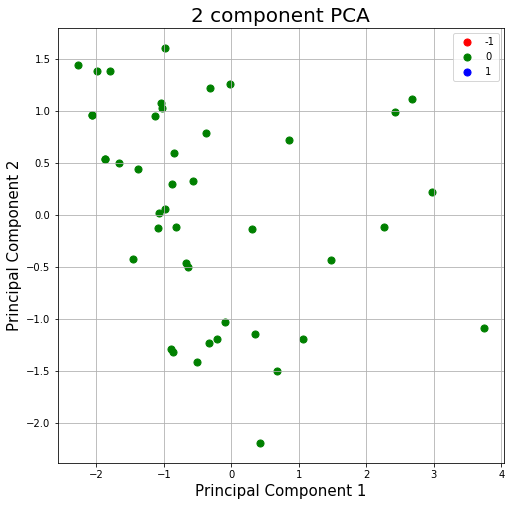

In [136]:
final_sourceDf = pd.concat([principalDf, sources_pca[['CompositeRisk']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_sourceDf['CompositeRisk'] == target
    ax.scatter(final_sourceDf.loc[indicesToKeep, 'principal component 1']
               , final_sourceDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

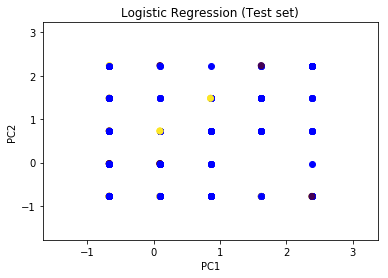

In [138]:

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X, y
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             #X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             #cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
#plt.legend()
  
# show scatter plot
plt.show()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: GroupIndex, dtype: float64

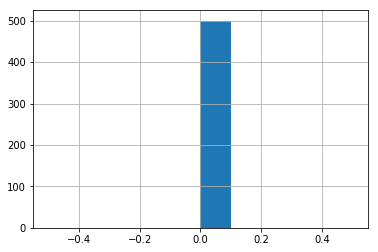

In [50]:
narrow_groups['GroupNumber'].hist()

plt.show()

# Regression Models

# Predicting Climate Risk Perceptions


In [158]:
#Creating dataframe
predict_df = pd.DataFrame()

group_df = dummy_groups
source_df = narrow_sources
hazards_df = narrow_exposure
hh_df = hh_info
risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

merge1 = pd.merge(group_df, source_df, on='HHID')
merge2 = pd.merge(merge1, hazards_df, on='HHID')
merge3 = pd.merge(merge2, hh_info, on='HHID')
predict_df = pd.merge(merge3, risk_df, on='HHID')

cleanpredict_df = predict_df.dropna()

In [159]:
cleanpredict_df

,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,GroupNumber,GroupIndex,...,Frost,Hail,Heat,HazardNumber,HazardIndex,H1,H2,Risk_Norm,SalienceIndex,CompositeRisk
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0.6,...,0.0,0.0,0.0,2,-0.831499,1,500000,0.166667,0.673077,0.112179
2,2301013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.2,...,0.0,0.0,0.0,1,-1.673097,1,270000,0.000000,0.615385,0.000000
3,2301016,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0.6,...,0.0,0.0,0.0,3,0.010099,1,400000,0.500000,1.000000,0.500000
4,2301017,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,180000,0.333333,0.692308,0.230769
5,2301021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,150000,0.166667,0.826923,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,3,0.010099,1,170000,0.666667,0.615385,0.410256
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,2,-0.831499,1,300000,1.000000,0.653846,0.653846
497,2611117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,...,0.0,0.0,0.0,2,-0.831499,0,150000,-0.166667,0.480769,-0.080128
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,7.0,0.0,0.0,4,0.851697,0,20000,0.333333,0.634615,0.211538


In [161]:
y = cleanpredict_df['CompositeRisk']

x_1 = cleanpredict_df[['SourceIndex', 'GroupIndex', 'HazardIndex', 'H1','H2']]
             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.054
Date:                Tue, 04 Oct 2022   Prob (F-statistic):             0.0700
Time:                        18:06:07   Log-Likelihood:                -22.256
No. Observations:                 498   AIC:                             56.51
Df Residuals:                     492   BIC:                             81.77
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1702      0.051      3.335      0.001       0.070       0.270
SourceIndex    -0.0140      0.012     -1.181      0.238      -0.037       0.009
GroupIndex      0.0147      0.057      0.259      0.795      -0.097       0.126
HazardIndex     0.0298      0.012      2.585      0.010       0.007       0.053
H1              0.0862      0.052      1.655      0.099      -0.016       0.189
H2          -1.239e-08   4.06e-08     -0.305      0.760   -9.21e-08    6.73e-08
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.561
Skew:                          -0.395   Prob(JB):                     0.000689
Kurtosis:                       3.279   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""